In [ ]:
## TODO: upload VAE to github

# !pip install --upgrade tensorflow
# !pip install -q -U keras-tuner
# !pip install --upgrade scikit-learn
!pip install --upgrade keras
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import ops
from keras import layers

#code from https://keras.io/examples/generative/vae/
#update code in GitHub when done with visualizations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


In [ ]:
from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator(1337)

    def call(self, inputs):
        z_mean, z_log_var = inputs # mean and log variance of latent distribution
        batch = ops.shape(z_mean)[0]
        dim = ops.shape(z_mean)[1]
        epsilon = keras.random.normal(shape=(batch, dim), seed=self.seed_generator)
        return z_mean + ops.exp(0.5 * z_log_var) * epsilon #parameterization trick

""" keras.random.normal generates a tensor epsilon of the same shape as (batch, dim)
# with random numbers sampled from a normal distribution."""



' keras.random.normal generates a tensor epsilon of the same shape as (batch, dim)\n# with random numbers sampled from a normal distribution.'

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Duke 2024-2025/NSF REU Rutgers 2024/Colab/data_for_henry_2024.csv")

# Extract the relevant columns for VAE (columns L to CH, which are the fish ASVs)
fish_asvs = df.iloc[:, 11:]

from sklearn.preprocessing import StandardScaler
from keras import layers, models, backend as K
from sklearn.model_selection import train_test_split

# Preprocess the data
fish_asvs = fish_asvs.dropna()
fish_asvs = fish_asvs.replace('', np.nan).dropna()
fish_asvs = fish_asvs.astype('float32')
scaler = StandardScaler()
fish_asvs_scaled = scaler.fit_transform(fish_asvs)

fish_asvs_scaled = np.expand_dims(np.expand_dims(fish_asvs_scaled, axis=-1), axis=-1)  # Reshape to (num_samples, 75, 1, 1)
fish_asvs_scaled.shape[1]

# X_train, X_test = train_test_split(fish_asvs_scaled, test_size=0.2, random_state=42)
fish_asvs_scaled

# abundance given for just that station: 20% at station X on one day, relative to day distribution - not absolute
# try by season?

array([[[[-0.24960677]],

        [[-0.62012565]],

        [[-0.37513068]],

        ...,

        [[-0.10660036]],

        [[-0.10660035]],

        [[-0.10660035]]],


       [[[ 0.24554059]],

        [[-0.49423277]],

        [[-0.4888702 ]],

        ...,

        [[-0.10660036]],

        [[-0.10660035]],

        [[-0.10660035]]],


       [[[ 0.558144  ]],

        [[-0.55845946]],

        [[ 0.36059415]],

        ...,

        [[-0.10660036]],

        [[-0.10660035]],

        [[-0.10660035]]],


       ...,


       [[[-0.65311736]],

        [[-0.09420079]],

        [[-0.7090228 ]],

        ...,

        [[-0.10660036]],

        [[-0.10660035]],

        [[-0.10660035]]],


       [[[-0.50333434]],

        [[-0.61083895]],

        [[-0.6036892 ]],

        ...,

        [[-0.10660036]],

        [[-0.10660035]],

        [[-0.10660035]]],


       [[[-0.39757457]],

        [[ 0.03404453]],

        [[-0.5423548 ]],

        ...,

        [[-0.10660036]],

        

In [ ]:
latent_dim = 2
epsilon_std = 1.0
input_dim = fish_asvs_scaled.shape[1]

from keras.layers import Input, Dense
import requests
from keras import layers, models
import numpy as np

# Assuming the input data has one channel
encoder_inputs = layers.Input(shape=(input_dim, 1, 1))  # Reshape to (75, 1, 1) for Conv2D
x = layers.Conv2D(32, (3, 1), activation="relu", strides=(2, 1), padding="same")(encoder_inputs)
x = layers.Conv2D(64, (3, 1), activation="relu", strides=(2, 1), padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])

encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

'''
'''

##VAE code
# encoder_inputs = layers.Input(shape=(input_dim,))
# x = layers.Dense(16, activation='relu')(encoder_inputs) # update shape to match data
# z_mean = layers.Dense(latent_dim, name='z_mean')(x)
# z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
# z_sampled = layers.Lambda(sampling)([z_mean, z_log_var])

# encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z_sampled], name='encoder')
# encoder.summary()

'''
'''

# Sampling function
# def sampling(args):
#     z_mean, z_log_var = args
#     batch = tf.shape(z_mean)[0]
#     dim = tf.shape(z_mean)[1]
#     epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
#     return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# # GPT
# from tensorflow.keras import layers, models

# input_dim = 75  # Define the dimension of your input data
# latent_dim = 2  # Define the dimension of the latent space

# # Define the input layer for encoder
# encoder_inputs = layers.Input(shape=(input_dim,))

# # Encoder layers
# x = layers.Dense(150, activation='relu')(encoder_inputs)
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(50, activation='relu')(x)
# # Latent variable outputs
# z_mean = layers.Dense(latent_dim, name='z_mean')(x)
# z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
# # Sampling layer
# z_sampled = layers.Lambda(sampling)([z_mean, z_log_var])

# # Create the encoder model
# encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z_sampled], name='encoder')
# encoder.summary()


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 75, 1, 1)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 38, 1, 32)      │            128 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 19, 1, 64)      │          6,208 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 1216)           │              0 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 16)             │         19,472 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_mean (Dense)            │ (None, 2)              │             34 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_log_var (Dense)         │ (None, 2)              │             34 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sampling_2 (Sampling)     │ (None, 2)              │              0 │ z_mean[0][0],          │
│                           │                        │                │ z_log_var[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 25,876 (101.08 KB)

 Trainable params: 25,876 (101.08 KB)

 Non-trainable params: 0 (0.00 B)

'\n'

In [ ]:
from keras import layers, models

latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(16, activation="relu")(latent_inputs)
x = layers.Dense(75, activation="relu")(x)
x = layers.Reshape((75, 1, 1))(x)
x = layers.Conv2DTranspose(64, (3, 1), activation="relu", strides=(1, 1), padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 1), activation="relu", strides=(1, 1), padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, (3, 1), activation="sigmoid", padding="same")(x)
decoder = models.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


'''
'''

# latent_inputs = keras.Input(shape=(2,))
# x = layers.Dense(16, activation='relu')(latent_inputs)
# decoder_outputs = layers.Dense(75, activation='sigmoid')(x) # update shape to match data
# decoder = keras.Model(latent_inputs, decoder_outputs, name='decoder')
# decoder.summary()

'''
'''

#GPT
# from tensorflow.keras import layers, models

# latent_dim = 2
# input_dim = 75
# latent_inputs = layers.Input(shape=(latent_dim,))

# # Define the decoder layers
# x = layers.Dense(50, activation='relu')(latent_inputs)
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(150, activation='relu')(x)
# x = layers.Dropout(0.2)(x)
# decoder_outputs = layers.Dense(input_dim, activation='sigmoid', name='main_output')(x)

# # Create the decoder model
# decoder = models.Model(latent_inputs, decoder_outputs, name='decoder')
# decoder.summary()


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 75)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 75, 1, 1)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_6 (Conv2DTranspose) │ (None, 75, 1, 64)           │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_7 (Conv2DTranspose) │ (None, 75, 1, 32)           │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_8 (Conv2DTranspose) │ (None, 75, 1, 1)            │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,852 (30.67 KB)

 Trainable params: 7,852 (30.67 KB)

 Non-trainable params: 0 (0.00 B)

'\n'

In [ ]:
#define VAE
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def encode(self, data):
      return self.encoder(data)[2]  # Return only the latent vector z

# updated training step for fish ASV
    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=-1,
                )
            )
            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
            )
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - kl_loss: 0.0165 - loss: 0.7158 - reconstruction_loss: 0.6994 - learning_rate: 1.0000e-06
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - kl_loss: 0.0197 - loss: 0.7199 - reconstruction_loss: 0.7001 - learning_rate: 1.0000e-06
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - kl_loss: 0.0195 - loss: 0.7184 - reconstruction_loss: 0.6989 - learning_rate: 1.0000e-06
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - kl_loss: 0.0169 - loss: 0.7174 - reconstruction_loss: 0.7005 - learning_rate: 1.0000e-06
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - kl_loss: 0.0155 - loss: 0.7144 - reconstruction_loss: 0.6990 - learning_rate: 1.0000e-06
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - kl_loss: 0.0163 - loss: 0.7150 - reconstruction_loss: 0.6987 - learning_rate: 1.0000e-06
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - kl_loss: 0.0179 - loss: 0.7168 - reconstruction_loss: 0.6990 - learning_rate: 1.0000e-06
Epoch 8/30
9/9 ━━━━━━━━━

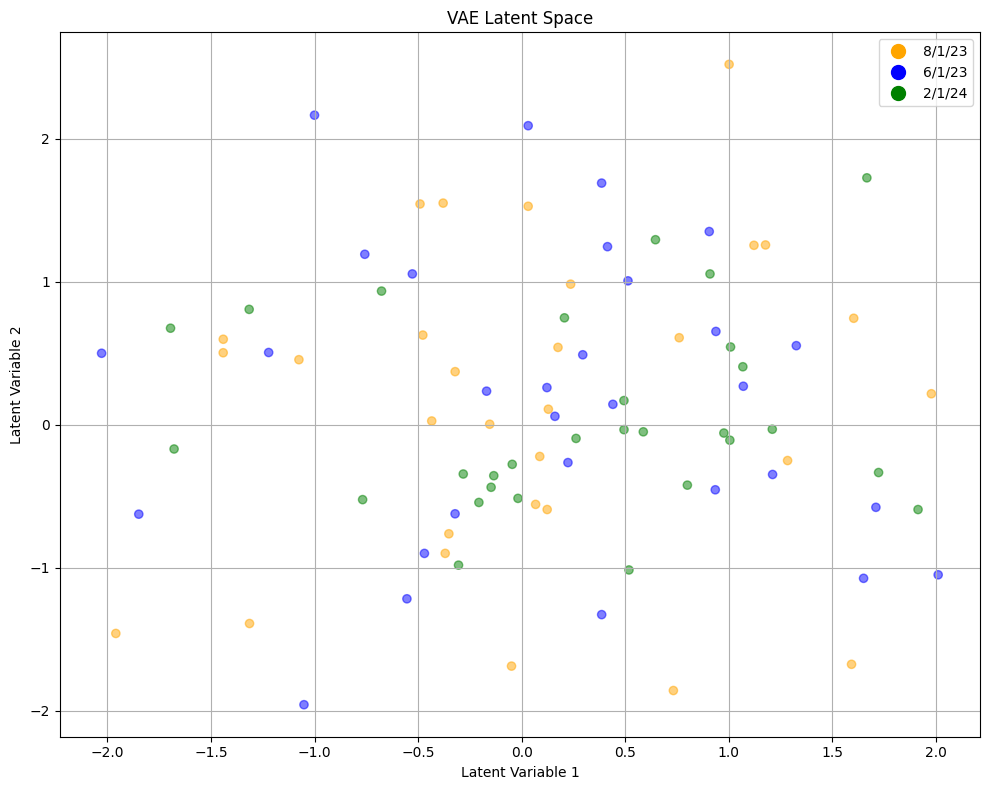

In [ ]:
from keras import callbacks
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

vae = VAE(encoder, decoder)
# vae.compile(optimizer=keras.optimizers.Adam())
# history = vae.fit(fish_asvs_scaled, epochs=50, batch_size=16)

'''
Train-test split not working. Contact Aziz?
'''

# Compile the VAE with an initial learning rate
initial_learning_rate = 1e-6
optimizer = Adam(learning_rate=initial_learning_rate)
vae.compile(optimizer=optimizer)
# Use the ReduceLROnPlateau callback to find the optimal learning rate
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=10, min_lr=1e-6, verbose=1)
history = vae.fit(fish_asvs_scaled, epochs=30, batch_size=10, callbacks=[reduce_lr])

latent_vectors = vae.encoder.predict(fish_asvs_scaled)[2]

# Plotting
import matplotlib.pyplot as plt
dates = df['date']

date_colors = {'8/1/23': 'orange', '6/1/23': 'blue', '2/1/24': 'green'}  # Adjust colors as needed
colors = [date_colors[date] for date in dates]

plt.figure(figsize=(10, 8))
plt.scatter(latent_vectors[:, 0], latent_vectors[:, 1], c=colors, alpha=0.5)
plt.xlabel("Latent Variable 1")
plt.ylabel("Latent Variable 2")
plt.title("VAE Latent Space")
plt.grid(True)

legend_labels = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10) for date, color in date_colors.items()]
plt.legend(legend_labels, date_colors.keys(), loc='best')

plt.tight_layout()
plt.show()



In [ ]:
# Assuming latent_vectors is obtained from vae.encoder.predict(fish_asvs_scaled)[2]
# Assuming dates is obtained from df['date']
from google.colab import files

# Create DataFrame
latent_df = pd.DataFrame(latent_vectors, columns=['Latent Variable 1', 'Latent Variable 2'])
latent_df['Date'] = dates  # Assuming 'dates' is the 'date' metadata from your original DataFrame

# Save to CSV
latent_df.to_csv('vae_latent_space_info.csv', index=False)
files.download('vae_latent_space_info.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>